<a href="https://colab.research.google.com/github/bkcaleb/Personal_Projects/blob/main/Image_Classification_oxford_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan  1 11:01:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from PIL import Image
import shutil
import random
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [4]:
import gdown
url = 'https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'oxford_pet.zip'
gdown.download(url,fname,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: /content/oxford_pet.zip
100%|██████████| 811M/811M [00:11<00:00, 69.7MB/s]


'oxford_pet.zip'

In [5]:
!ls -l

total 791576
-rw-r--r-- 1 root root 810565619 Jan  1 11:02 oxford_pet.zip
drwxr-xr-x 1 root root      4096 Dec  3 14:33 sample_data


In [6]:
!unzip -q oxford_pet.zip -d oxford_pet

In [7]:
!ls oxford_pet

annotations  images


In [8]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir,'oxford_pet')
image_dir = os.path.join(data_dir,'images')

In [9]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7390


In [10]:
for image_file in image_files:
  image_path = os.path.join(image_dir,image_file)
  image = Image.open(image_path)
  image_mode = image.mode
  if image_mode != 'RGB':
    print(image_file,image_mode)
    image = np.asarray(image)
    print(image.shape)
    os.remove(image_path)

Egyptian_Mau_191.jpg P
(214, 300)
Abyssinian_34.jpg P
(202, 250)
Egyptian_Mau_14.jpg RGBA
(800, 582, 4)
staffordshire_bull_terrier_2.jpg L
(282, 500)
Egyptian_Mau_145.jpg P
(188, 216)
Egyptian_Mau_129.jpg L
(325, 299)
Egyptian_Mau_186.jpg RGBA
(275, 183, 4)
Egyptian_Mau_167.jpg P
(275, 183)
staffordshire_bull_terrier_22.jpg L
(500, 364)
Abyssinian_5.jpg RGBA
(150, 200, 4)
Egyptian_Mau_139.jpg P
(250, 350)
Egyptian_Mau_177.jpg P
(175, 246)


In [11]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7378


In [12]:
image_files[:10]

['havanese_92.jpg',
 'miniature_pinscher_188.jpg',
 'havanese_125.jpg',
 'great_pyrenees_123.jpg',
 'Siamese_169.jpg',
 'Abyssinian_220.jpg',
 'pug_107.jpg',
 'Bombay_5.jpg',
 'japanese_chin_141.jpg',
 'pomeranian_39.jpg']

In [13]:
class_list = set()
for image_file in image_files:
  file_name = os.path.splitext(image_file)[0]
  class_name = re.sub('_\d+','',file_name)
  class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

37


In [14]:
class_list.sort()
class_list

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [15]:
class2idx = {cls:idx for idx,cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [16]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir,exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [17]:
image_files.sort()

In [18]:
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [19]:
cnt = 0
previous_class =""
for image_file in image_files:
  file_name = os.path.splitext(image_file)[0]
  class_name = re.sub('_\d+','',file_name)
  if class_name == previous_class:
    cnt+=1
  else:
    cnt= 1
  if cnt <= 160:
    cpath = train_dir
  else:
    cpath = val_dir
  image_path = os.path.join(image_dir, image_file)
  shutil.copy(image_path, cpath)
  previous_class = class_name

In [20]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

In [21]:
print(len(train_images),len(val_images))

5920 1458


In [22]:
IMG_SIZE = 224

In [23]:
tfr_dir = os.path.join(data_dir,'tfrecord')
os.makedirs(tfr_dir,exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir,'cls_val.tfr')

In [24]:
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)


In [25]:
def _bytes_feature(value):
  """"Returns a bytes_list from a string / byte."""
  if isinstance(value,type(tf.constant(0))):
    value = value.numpy()
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [26]:
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
  train_path = os.path.join(train_dir,train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE,IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(train_file)[0]
  class_name = re.sub('_\d+', '', file_name)
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1
writer_train.close()
print(n_train)

5920


In [27]:
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
  val_path = os.path.join(val_dir,val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE,IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0]
  class_name = re.sub('_\d+', '', file_name)
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1
writer_val.close()
print(n_val)

1458


In [28]:
ls -l $tfr_dir


total 1085016
-rw-r--r-- 1 root root 891486880 Jan  1 11:03 cls_train.tfr
-rw-r--r-- 1 root root 219558762 Jan  1 11:04 cls_val.tfr


In [29]:
N_CLASS = len(class_list)
N_EPOCHS = 50
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))

In [30]:
def _parse_function(tfrecord_serialized):
  features={'image': tf.io.FixedLenFeature([],tf.string),
            'cls_num': tf.io.FixedLenFeature([],tf.int64)}
  parsed_features = tf.io.parse_single_example(tfrecord_serialized,features)

  image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
  image = tf.reshape(image, [IMG_SIZE,IMG_SIZE,3])
  image = tf.cast(image, tf.float32)/255.

  label = tf.cast(parsed_features['cls_num'], tf.int64)
  label = tf.one_hot(label,N_CLASS)
  return image,label

In [31]:
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(N_TRAIN).prefetch(tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [32]:
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

TypeError: ignored

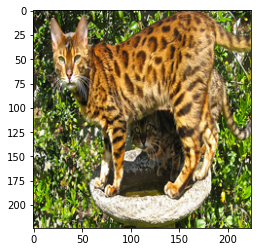

In [37]:
for image,label in train_dataset.take(5):
  plt.imshow(image[0])
  title = class_list[label[0].numpy()]
  plt.title(title)
  plt.show()

In [36]:
def create_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,3,activation='relu',padding='SAME',
                                input_shape=(IMG_SIZE,IMG_SIZE,3)))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(64,3,activation='relu',padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(128,3,activation='relu',padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256,3,activation='relu',padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256,3,activation='relu',padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(1024, activation='relu'))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
  return model

In [38]:
model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

In [ ]:
def create_bn_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,3,padding='SAME',
                                input_shape=(IMG_SIZE,IMG_SIZE,3)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(64,3,padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(128,3,padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256,3,padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256,3,padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(1024))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
  return model

In [ ]:
model = create_bn_model()
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*5,
                                                          decay_rate=0.5,
                                                          staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 64)     

In [ ]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 20s 116ms/step - loss: 3.1973 - accuracy: 0.1610 - val_loss: 5.5425 - val_accuracy: 0.0261
Epoch 2/20
148/148 [==============================] - 19s 116ms/step - loss: 1.6433 - accuracy: 0.5872 - val_loss: 5.8468 - val_accuracy: 0.0316
Epoch 3/20
148/148 [==============================] - 19s 115ms/step - loss: 0.6685 - accuracy: 0.9056 - val_loss: 4.0022 - val_accuracy: 0.0988
Epoch 4/20
148/148 [==============================] - 19s 114ms/step - loss: 0.2070 - accuracy: 0.9924 - val_loss: 2.9790 - val_accuracy: 0.2353
Epoch 5/20
148/148 [==============================] - 19s 114ms/step - loss: 0.0778 - accuracy: 0.9998 - val_loss: 2.6493 - val_accuracy: 0.2853
Epoch 6/20
148/148 [==============================] - 19s 115ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 2.6373 - val_accuracy: 0.2894
Epoch 7/20
148/148 [==============================] - 19s 115ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 2.6334 - val_ac

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [41]:
from tensorflow.keras import models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [42]:
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))


9420800/9406464 [==============================] - 0s 0us/step


In [43]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
def create_mv_model():
  model = models.Sequential()
  model.add(mobilenetv2)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(N_CLASS,activation='softmax'))
  return model

In [ ]:
model = create_mv_model()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*5,
                                                          decay_rate=0.5,
                                                          staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 37)                47397     
Total params: 2,305,381
Trainable params: 2,271,269
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 48s 280ms/step - loss: 1.1569 - accuracy: 0.7144 - val_loss: 0.6183 - val_accuracy: 0.7853
Epoch 2/20
148/148 [==============================] - 42s 271ms/step - loss: 0.2421 - accuracy: 0.9351 - val_loss: 0.5152 - val_accuracy: 0.8237
Epoch 3/20
148/148 [==============================] - 42s 269ms/step - loss: 0.1058 - accuracy: 0.9785 - val_loss: 0.4486 - val_accuracy: 0.8642
Epoch 4/20
148/148 [==============================] - 42s 271ms/step - loss: 0.0520 - accuracy: 0.9931 - val_loss: 0.3892 - val_accuracy: 0.8848
Epoch 5/20
148/148 [==============================] - 42s 273ms/step - loss: 0.0316 - accuracy: 0.9971 - val_loss: 0.3604 - val_accuracy: 0.8882
Epoch 6/20
148/148 [==============================] - 42s 271ms/step - loss: 0.0187 - accuracy: 0.9985 - val_loss: 0.3021 - val_accuracy: 0.9081
Epoch 7/20
148/148 [==============================] - 42s 271ms/step - loss: 0.0146 - accuracy: 0.9993 - val_loss: 0.2886 - val_ac

In [44]:
def cutmix(images,labels,PROB=0.5):
  imgs = []; labs = []
  for i in range(N_BATCH):
    APPLY = tf.cast(tf.random.uniform(()) <= PROB, tf.int32)
    idx = tf.random.uniform((), 0, N_BATCH, tf.int32)

    W = IMG_SIZE; H = IMG_SIZE
    lam = tf.random.uniform(())
    cut_ratio = tf.math.sqrt(1.-lam)
    cut_w = tf.cast(W*cut_ratio, tf.int32)*APPLY
    cut_h = tf.cast(H*cut_ratio, tf.int32)*APPLY

    cx = tf.random.uniform((), int(W/8), int(7/8*W), tf.int32)
    cy = tf.random.uniform((), int(H/8), int(7/8*H), tf.int32)

    xmin = tf.clip_by_value(cx - cut_w//2,0,W)
    ymin = tf.clip_by_value(cy - cut_h//2,0,H)
    xmax = tf.clip_by_value(cx + cut_w//2,0,W)
    ymax = tf.clip_by_value(cy + cut_h//2,0,H)

    mid_left = images[i,ymin:ymax,:xmin,:]
    mid_mid = images[idx,ymin:ymax,xmin:xmax,:]
    mid_right = images[i,ymin:ymax,xmax:,:]
    middle = tf.concat([mid_left,mid_mid,mid_right], axis=1)
    top = images[i,:ymin,:,:]
    bottom = images[i,ymax:,:,:]
    new_img = tf.concat([top,middle,bottom], axis=0)
    imgs.append(new_img)

    alpha = tf.cast((cut_w*cut_h)/(W*H), tf.float32)
    label1 = labels[i]; label2 = labels[idx]
    new_label = ((1-alpha)*label1 + alpha*label2)
    labs.append(new_label)

  new_imgs = tf.reshape(tf.stack(imgs), [-1,IMG_SIZE,IMG_SIZE, 3])
  new_labs = tf.reshape(tf.stack(labs),[-1,N_CLASS])

  return new_imgs,new_labs


In [45]:
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH)
train_dataset = train_dataset.map(cutmix).repeat()

In [46]:
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


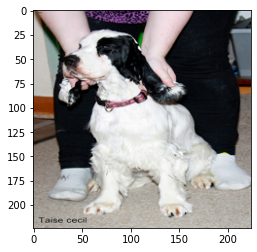

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.31140387 0.
 0.         0.         0.         0.         0.6885961  0.
 0.         0.         0.         0.         0.         0.
 0.        ]


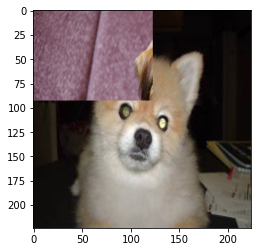

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


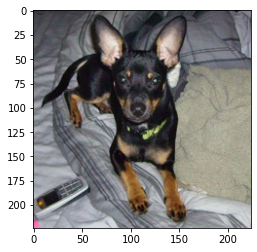

[0.         0.         0.         0.         0.92984694 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07015306 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


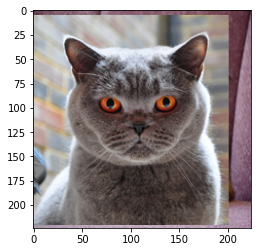

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


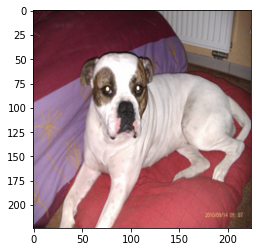

[0.         0.         0.         0.         0.01915258 0.
 0.         0.         0.         0.         0.         0.9808474
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


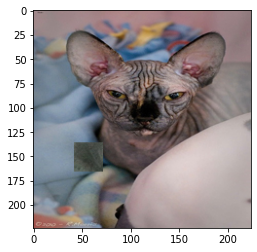

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


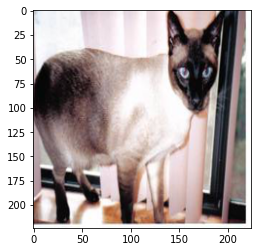

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.71191406 0.28808594 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


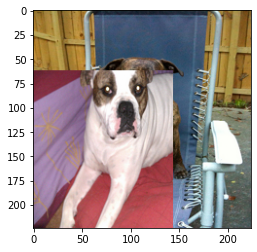

[0.         0.         0.         0.         0.04402503 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.95597494 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


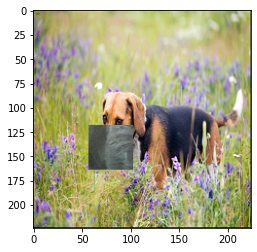

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


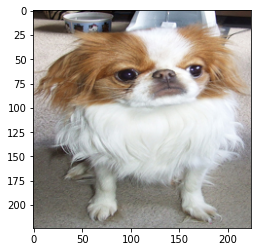

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


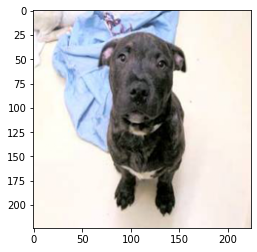

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


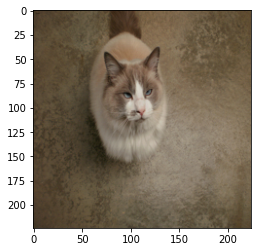

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.36854273 0.63145727 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


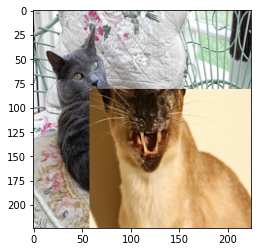

[0.         0.         0.         0.         0.63677853 0.
 0.         0.         0.         0.36322147 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


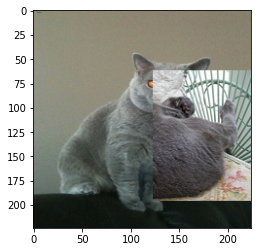

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


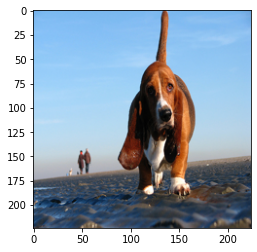

[0.         0.         0.         0.         0.71191406 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.28808594
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


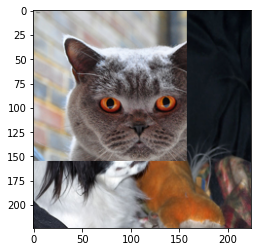

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


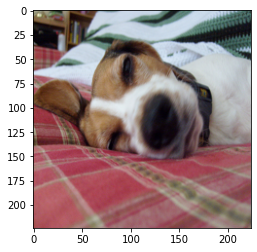

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.8163265  0.         0.         0.
 0.18367347]


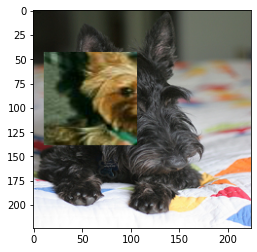

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.43654338
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.56345665]


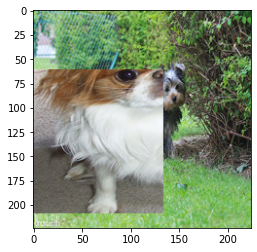

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


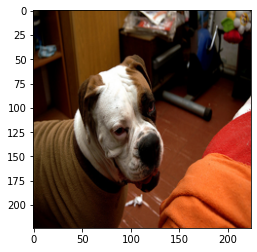

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.65292174 0.         0.
 0.         0.         0.         0.         0.34707826 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


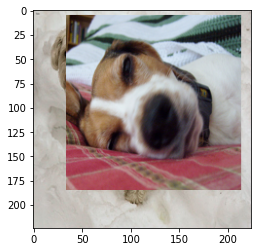

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


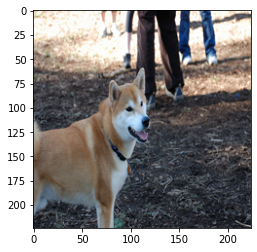

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


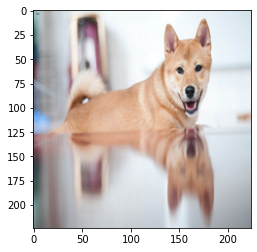

[0.         0.         0.         0.         0.47265625 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.52734375 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


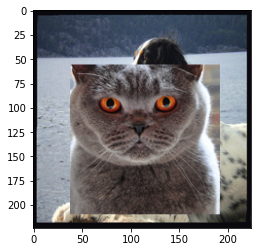

[0.         0.         0.         0.         0.         0.
 0.         0.51498723 0.         0.         0.48501277 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


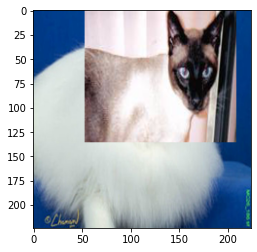

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.15433674 0.         0.         0.         0.         0.
 0.         0.         0.84566325 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


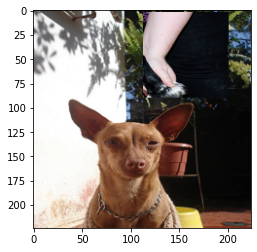

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


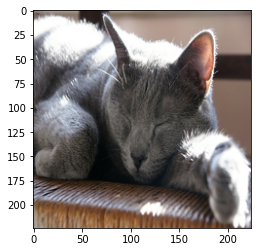

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


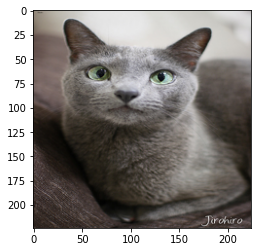

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


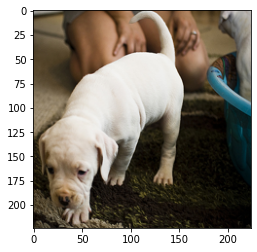

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.689493 0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.310507]


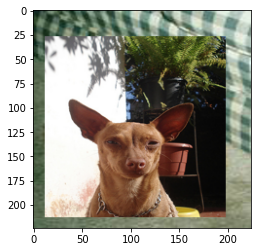

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.7971939  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.20280612
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


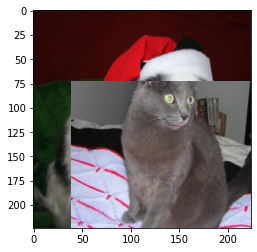

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


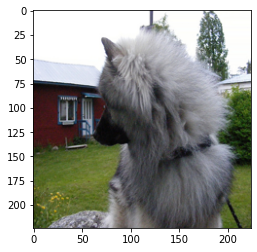

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


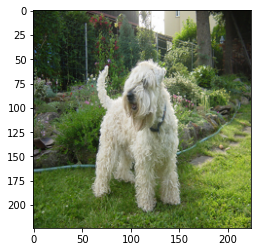

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.59245455 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.40754545
 0.        ]


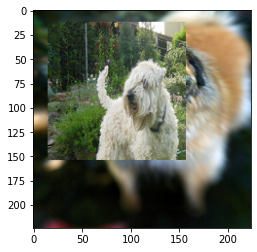

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


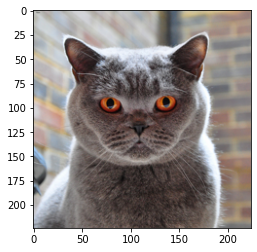

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


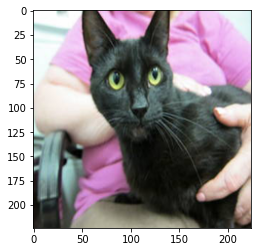

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


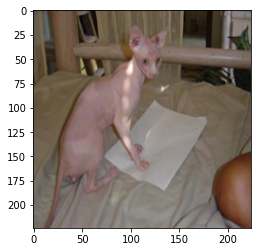

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


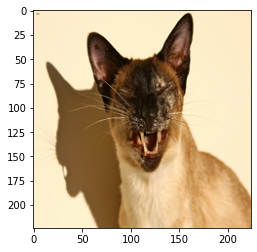

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


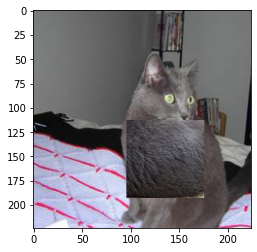

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


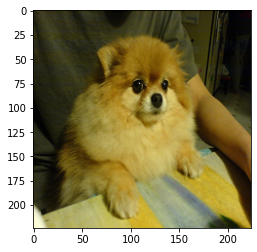

In [47]:
for image, label in train_dataset.take(1):
  for i in range(N_BATCH):
    print(label[i].numpy())
    plt.imshow(image[i])
    plt.show()

In [48]:
def create_mv2_model():
  model = models.Sequential()
  model.add(mobilenetv2)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(N_CLASS,activation='softmax'))
  return model

In [49]:
model = create_mv2_model()

LR_INIT = 0.000001
LR_MAX = 0.0002
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
  if epoch < RAMPUP_EPOCH:
    lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
  else:
    lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
  return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                      

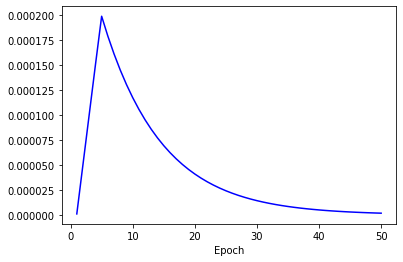

In [ ]:
def plot_lr():
  lr=[]
  epoch_list = list(np.arange(N_EPOCHS)+1)
  for epoch in range(N_EPOCHS):
    lr.append(lr_schedule_fn(epoch))
  plt.plot(epoch_list,lr,'b-')
  plt.xlabel('Epoch')
  plt.show()

plot_lr()

In [ ]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[lr_callback]
)

Epoch 1/50
148/148 [==============================] - 85s 319ms/step - loss: 3.9328 - accuracy: 0.0356 - val_loss: 3.8729 - val_accuracy: 0.0453
Epoch 2/50
148/148 [==============================] - 44s 282ms/step - loss: 2.6466 - accuracy: 0.4245 - val_loss: 1.3417 - val_accuracy: 0.7949
Epoch 3/50
148/148 [==============================] - 44s 283ms/step - loss: 1.7911 - accuracy: 0.7172 - val_loss: 1.1084 - val_accuracy: 0.8683
Epoch 4/50
148/148 [==============================] - 44s 285ms/step - loss: 1.6273 - accuracy: 0.7699 - val_loss: 1.1168 - val_accuracy: 0.8594
Epoch 5/50
148/148 [==============================] - 45s 291ms/step - loss: 1.5599 - accuracy: 0.7992 - val_loss: 1.1730 - val_accuracy: 0.8464
Epoch 6/50
148/148 [==============================] - 45s 291ms/step - loss: 1.4805 - accuracy: 0.8186 - val_loss: 1.1583 - val_accuracy: 0.8402
Epoch 7/50
148/148 [==============================] - 45s 289ms/step - loss: 1.4279 - accuracy: 0.8334 - val_loss: 1.0788 - val_ac

In [50]:
from tensorflow.keras.applications.densenet import DenseNet121

In [51]:
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))

29097984/29084464 [==============================] - 0s 0us/step


In [52]:
densenet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [53]:
def create_dense_model():
  model = models.Sequential()
  model.add(densenet)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(N_CLASS,activation='softmax'))
  return model

In [54]:
model = create_dense_model()

LR_INIT = 0.000001
LR_MAX = 0.0002
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
  if epoch < RAMPUP_EPOCH:
    lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
  else:
    lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
  return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 37)               

In [55]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[lr_callback]
)

Epoch 1/50
148/148 [==============================] - 203s 1s/step - loss: 3.9859 - accuracy: 0.0215 - val_loss: 3.8063 - val_accuracy: 0.0288 - lr: 1.0000e-06
Epoch 2/50
148/148 [==============================] - 179s 1s/step - loss: 2.5968 - accuracy: 0.4552 - val_loss: 1.2406 - val_accuracy: 0.8628 - lr: 5.0750e-05
Epoch 3/50
148/148 [==============================] - 179s 1s/step - loss: 1.6992 - accuracy: 0.7559 - val_loss: 1.0301 - val_accuracy: 0.9102 - lr: 1.0050e-04
Epoch 4/50
148/148 [==============================] - 179s 1s/step - loss: 1.5332 - accuracy: 0.7956 - val_loss: 1.0129 - val_accuracy: 0.9122 - lr: 1.5025e-04
Epoch 5/50
148/148 [==============================] - 178s 1s/step - loss: 1.4619 - accuracy: 0.8252 - val_loss: 1.0442 - val_accuracy: 0.8978 - lr: 1.9900e-04
Epoch 6/50
148/148 [==============================] - 178s 1s/step - loss: 1.3755 - accuracy: 0.8546 - val_loss: 1.0242 - val_accuracy: 0.9040 - lr: 1.7910e-04
Epoch 7/50
148/148 [====================

In [91]:
import urllib.request

###REAL TESTING###
##UPLOAD ANY DOG OR CAT PIC AND LOAD IT##

URL = 'https://www.akc.org/wp-content/uploads/2017/11/Shiba-Inu-fetching-a-stick-outdoors.jpg'

with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as file_image:
        file_image.write(url.read())

In [92]:
image = Image.open('temp.jpg')
image = image.resize((224,224))
image = np.array(image)
image = image/255

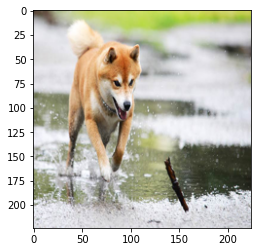

In [93]:
plt.imshow(image)
plt.show()


In [94]:
image = np.reshape(image, (1,224,224,3))

In [95]:
pred = model.predict(image)
pred.shape

(1, 37)

In [96]:
pred_class = np.argmax(pred,axis=-1)
pred

array([[0.00618491, 0.0134786 , 0.00871195, 0.00603973, 0.01618177,
        0.00839127, 0.00400654, 0.01107131, 0.00561903, 0.00486014,
        0.0046994 , 0.00651349, 0.0103218 , 0.00151337, 0.00403538,
        0.0035252 , 0.00975833, 0.01214571, 0.00361021, 0.00813252,
        0.03786184, 0.01580524, 0.00899938, 0.01286564, 0.01088523,
        0.00847697, 0.00756324, 0.01349116, 0.02321362, 0.00246748,
        0.00706868, 0.00409005, 0.00841175, 0.6538621 , 0.0182082 ,
        0.00752209, 0.01040663]], dtype=float32)

In [97]:
class_list[int(pred_class)]

'shiba_inu'

In [98]:
URL = 'https://www.rover.com/blog/wp-content/uploads/2018/12/chihuahua-820087_1920.jpg'

with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as file_image:
        file_image.write(url.read())

In [99]:
image = Image.open('temp.jpg')
image = image.resize((224,224))
image = np.array(image)
image = image/255

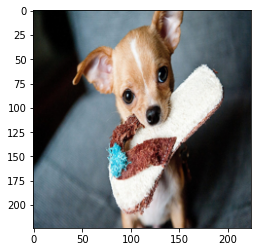

In [100]:
plt.imshow(image)
plt.show()


In [101]:
image = np.reshape(image, (1,224,224,3))

In [102]:
pred = model.predict(image)
pred.shape

(1, 37)

In [103]:
pred_class = np.argmax(pred,axis=-1)
pred

array([[0.01541625, 0.00636947, 0.00286273, 0.01449705, 0.00591942,
        0.00832643, 0.00411373, 0.00682536, 0.00380927, 0.00517605,
        0.00457042, 0.00550901, 0.01140795, 0.00321276, 0.01318465,
        0.01720682, 0.00800403, 0.63153285, 0.0098582 , 0.00651638,
        0.01333974, 0.00572981, 0.02085228, 0.01327147, 0.00509826,
        0.00561705, 0.02183917, 0.01033448, 0.01947085, 0.00814591,
        0.01315564, 0.00660365, 0.02704126, 0.01180905, 0.01312519,
        0.01474441, 0.00550303]], dtype=float32)

In [104]:
class_list[int(pred_class)]

'chihuahua'